<a href="https://colab.research.google.com/github/rishicarter/t-SNE_vs_PCA/blob/main/t_SNE_Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Principal Component Analysis(PCA)**

	An unsupervised, deterministic algorithm used for feature extraction as well as visualization
	
	Applies a linear dimensionality reduction technique where the focus is on keeping the dissimilar points far apart in a lower-dimensional space.
	
	Transforms the original data to a new data by preserving the variance in the data using eigenvalues.
	
	Outliers impact PCA.
**t-Distributed Stochastic Neighbourh Embedding(t-SNE)**

	An unsupervised, randomized algorithm, used only for visualization

	Applies a non-linear dimensionality reduction technique where the focus is on keeping the very similar data points close together in lower-dimensional space.

	Preserves the local structure of the data using student t-distribution to compute the similarity between two points in lower-dimensional space.

	t-SNE uses a heavy-tailed Student-t distribution to compute the similarity between two points in the low-dimensional space rather than a Gaussian distribution, which helps to address the crowding and optimization problems.

	Outliers do not impact t-SNE

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets,manifold,decomposition

In [3]:
data = datasets.fetch_openml(
    name='mnist_784',
    version=1,
    return_X_y=True
)
images,targets=data
targets=targets.astype(int)

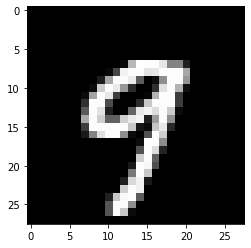

In [42]:
plt.imshow(images[45:46].values[0].reshape(28,28), cmap='gray');

In [45]:
# Performing t-SNE
tsne=manifold.TSNE(n_components=2, random_state=42)
transformed_data=tsne.fit_transform(images.iloc[:3000,:])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [47]:
tsne_df=pd.DataFrame(
    np.column_stack((transformed_data, targets[:3000])),
    columns=['x','y','targets']
)
tsne_df.loc[:,'target']=tsne_df.targets.astype(int)
tsne_df

,x,y,targets,target
0,31.722771,-16.391663,5.0,5
1,10.612940,-67.804901,0.0,0
2,49.593014,38.388294,4.0,4
3,-37.814510,32.660255,1.0,1
4,22.104887,31.574816,9.0,9
...,...,...,...,...
2995,1.683464,53.675167,7.0,7
2996,14.697905,-62.843128,0.0,0
2997,-7.642507,42.416336,9.0,9
2998,-58.103531,-4.892649,1.0,1


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


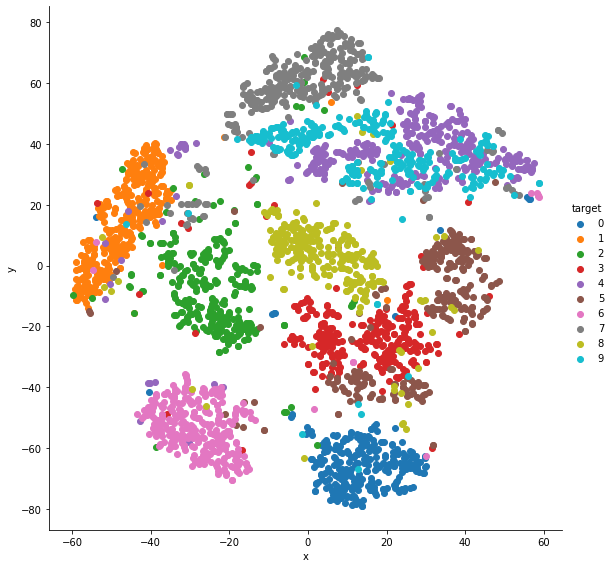

In [48]:
#Visualise after dimensionality reduction
grid=sns.FacetGrid(tsne_df, hue='target', size=8)
grid.map(plt.scatter,'x','y').add_legend()

In [51]:
# Performing PCA
pca=decomposition.PCA(n_components=2, random_state=42)
transformed_data=pca.fit_transform(images.iloc[:3000,:])

In [52]:
pca_df=pd.DataFrame(
    np.column_stack((transformed_data, targets[:3000])),
    columns=['x','y','targets']
)
pca_df.loc[:,'target']=pca_df.targets.astype(int)
pca_df

,x,y,targets,target
0,163.270796,346.461952,5.0,5
1,1077.732347,389.647381,0.0,0
2,-75.700767,-416.948327,4.0,4
3,-909.505135,617.938675,1.0,1
4,-344.805857,-716.563572,9.0,9
...,...,...,...,...
2995,-263.802747,-837.787824,7.0,7
2996,1308.054868,264.345099,0.0,0
2997,-457.946292,-196.687674,9.0,9
2998,-742.243845,63.128130,1.0,1


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


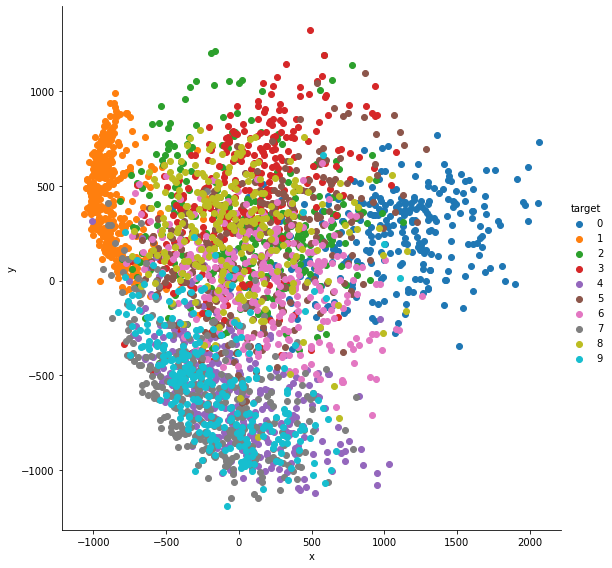

In [53]:
#Visualise after dimensionality reduction
grid=sns.FacetGrid(pca_df, hue='target', size=8)
grid.map(plt.scatter,'x','y').add_legend()